# CUNY MSDS DATA618 - Quantative Finance

## Week 4 : Brain Stumper 

### Ramnivas Singh
---------------------
The following Investopedia post (https://www.investopedia.com/ask/answers/06/oilpricesinflation.asp) posits a reduced influence of oil prices on inflation today compared to the past 

You should be able to demonstrate (or refute) this assertion by measuring the degree of correlation of inflation measures (CPI and/or PPI) and the price of oil and/or motor fuel costs over time.

__Challenge:__

1. Source monthly oil and motor fuel price data for a significant period (~ 30 years or longer) from a reputable source (E.g.: US Energy Information Administration - https://www.eia.gov/)
2. Source inflation rate (CPI and PPI) data from an authoritative source (E.g.: US Bureau of Labor Statistics - https://www.bls.gov/)
3. Determine and plot the correlation between energy costs and inflation and demonstrate its change over the period studied.
4. Provide an assessment of the causes for the changes.
5. Commit your analyses, code used, results and summary presentation in your personal repo and send me links to your work in response to this email.

### Solution

__1.__

Monthly motor fuel price data is sourced from https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=emm_epm0_pte_nus_dpg&f=m

A copy of the datafile is retained at github - https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv

In [649]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
gasoline_prices = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",
                     skiprows = 4,parse_dates = ['Month'])
gasoline_prices

,Month,U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon
0,2022-09-01,3.817
1,2022-08-01,4.087
2,2022-07-01,4.668
3,2022-06-01,5.032
4,2022-05-01,4.545
...,...,...
349,1993-08-01,1.062
350,1993-07-01,1.078
351,1993-06-01,1.097
352,1993-05-01,1.100


In [650]:
# Rename the columns and create index 
gasoline_prices = gasoline_prices.rename(columns={'Month': 'Date', 'U.S. All Grades All Formulations Retail Gasoline Prices Dollars per Gallon': 'Oil'})
gasoline_prices=gasoline_prices.set_index('Date', inplace = False)
gasoline_prices.sort_values(by='Date')
gasoline_prices=gasoline_prices.iloc[1:] # removed extra row, we just need 30 years of data to join with CPI later
gasoline_prices.head()

,Oil
Date,
2022-08-01,4.087
2022-07-01,4.668
2022-06-01,5.032
2022-05-01,4.545
2022-04-01,4.213


<AxesSubplot:xlabel='Date'>

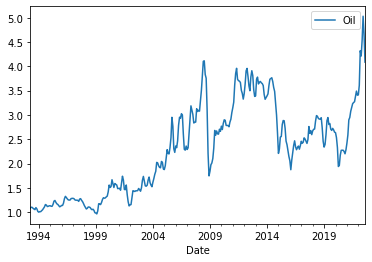

In [651]:
# Plot Oil prices $ per gallon in last 30 years
gasoline_prices.plot()

__2.__

Lets download the Bureau of Labor Statistics Consumer Price Index Dataset from the site
https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/

Lets load the dataset. This dataset is a time series data.

In [652]:
cpi = pd.read_csv("https://raw.githubusercontent.com/CUNY-SPS-Data-Science-Program/set-up-rnivas2028/BrainStumpers/SeriesReport-20221003223734_12c428.csv",
                     skiprows = 1, on_bad_lines='skip')
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1993,0.4,0.2,0.1,0.3,0.3,0.1,0.1,0.2,0.1,0.4,0.3,0.2
1,1994,0.0,0.3,0.3,0.1,0.2,0.3,0.3,0.4,0.2,0.1,0.3,0.2
2,1995,0.3,0.3,0.2,0.4,0.2,0.2,0.1,0.2,0.1,0.3,0.1,0.1
3,1996,0.5,0.2,0.3,0.4,0.2,0.2,0.2,0.1,0.3,0.3,0.3,0.3
4,1997,0.2,0.2,0.1,0.1,0.0,0.2,0.1,0.2,0.2,0.2,0.1,0.1
5,1998,0.1,0.0,0.0,0.1,0.2,0.1,0.2,0.1,0.1,0.2,0.1,0.2
6,1999,0.2,0.0,0.1,0.7,0.1,0.0,0.4,0.2,0.4,0.2,0.2,0.2
7,2000,0.3,0.4,0.6,-0.1,0.2,0.6,0.3,0.0,0.5,0.2,0.2,0.2
8,2001,0.6,0.2,0.1,0.2,0.5,0.2,-0.2,0.0,0.4,-0.3,-0.1,-0.1
9,2002,0.2,0.2,0.3,0.4,0.1,0.1,0.2,0.3,0.2,0.2,0.2,0.2


In [653]:
# Reshape (melt) the data to a time series format for last 30 years
cpi=cpi.melt(id_vars= ['Year'], var_name ='Month')
cpi['Date']=pd.to_datetime(cpi.Year.astype(str) + '/' + cpi.Month.astype(str) + '/01')
del cpi['Year'] # these columns are not needed anymore
del cpi['Month']
cpi = cpi.rename(columns={'value': 'CPI'})
cpi.head()

,CPI,Date
0,0.4,1993-01-01
1,0.0,1994-01-01
2,0.3,1995-01-01
3,0.5,1996-01-01
4,0.2,1997-01-01


<AxesSubplot:xlabel='Date'>

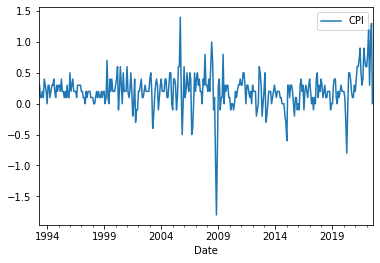

In [654]:
# create an index to plot CPI data as a time series dataset
cpi.sort_values(by=['Date'], inplace=True, ascending=False)
cpi=cpi.iloc[4:len(cpi)-3]
cpi=cpi.set_index('Date', inplace = False).sort_values(by='Date')
cpi.plot()

In [655]:
gasoline_prices_cpi=pd.merge(gasoline_prices,cpi,on='Date')
gasoline_prices_cpi.head()

,Oil,CPI
Date,,
2022-08-01,4.087,0.1
2022-07-01,4.668,0.0
2022-06-01,5.032,1.3
2022-05-01,4.545,1.0
2022-04-01,4.213,0.3


__3.__

Let try finding a orrelation between energy costs and inflation in last 30 years 

Text(0, 0.5, 'Consumer Price Index(CPI)')

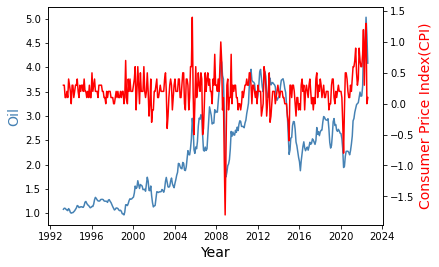

In [656]:
fig,ax = plt.subplots()
ax.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.Oil, color='steelblue')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Oil', color=col1, fontsize=14)

ax2 = ax.twinx()

ax2.plot(gasoline_prices_cpi.index,gasoline_prices_cpi.CPI, color='red')
ax2.set_ylabel('Consumer Price Index(CPI)', color=col2, fontsize=14)

In [657]:
selected = pd.DataFrame(zip(gasoline_prices_cpi['Oil'],
                            gasoline_prices_cpi['CPI']),
                        columns=['Oil','CPI'])

In [658]:
selected.corr()

,Oil,CPI
Oil,1.000000,0.154722
CPI,0.154722,1.000000


__4__

Positive factional value(0.154722) shows a positive but marginal correlation. It’s no secret that fluctuations in oil prices can lead to dramatic swings in headline price inflation, as chart above shows.

After all, not only does oil fuel the vast majority of transportation needs, it’s also a critical raw material used in consumer products far and wide, and much of the price swings in oil are passed on to consumers. With oil moving higher compared to year-ago prices, we should naturally expect a transitory boost to headline CPI as a result. 

It’s important to remember that long-term nominal interest rates are a function of three variables: growth expectations, inflation expectations, and term premium. Treasury Inflation Protected Securities (TIPS) rates are the sum of growth expectations and the term premium (the added yield investors require to hold longer dated bonds). 


Currently, with oil moving higher compared to year-ago prices, we should naturally expect a transitory boost to headline CPI as a result. In fact, if WTI crude prices stay flat through June, the year-over-year price increase would be significant. But because oil market fundamentals are so strong currently, I think it an elevated likelihood that oil prices move higher from current levels. 

2022 has so far brought in the highest price of crude oil since late 2011-2013, but we shouldn’t be surprised by the price action. Indeed, ignoring geopolitics for a moment, the fundamental picture for the crude markets haven’t been this favorable in years. As we will see, from inventory levels, to the US dollar, to economic growth, to the setup in the futures markets, most signs are pointing to higher oil prices ahead.
